In [19]:
import numpy as np
import common
from exp_family import update_IW, init_IW_hyp, get_IW_pars_from_hyp

In [20]:
traj, xk, P, tau, rho, u, U, H, F, Q, N = common.init_all()

In [21]:
t = 0
x_log = []
P_log = []
for zk in traj.Y.T:
    #print('===== Step: ', t, '======') 
    t += 1
    
    #### Time update
    # xkl
    xk = common.predict_state(F, xk)  # xll
    # Pkl
    P = common.predict_PECM(F, P, Q)  # Pll
    
    #### Measurement update
    ## Initialization - step 3
    # Pikk
    Pik = P
    # xikk
    xikk = xk
    
    # tkl, Tkl, ukl, Ukl 
    tkk, Tkk, ukl, Ukl = common.init(P, tau, P.shape[0], rho, u, U.shape[0], U)
    
    hyp_P = init_IW_hyp(Tkk, tkk)
    hyp_P_prev = hyp_P.copy()
    
    hyp_R = init_IW_hyp(Ukl, ukl)
    hyp_R_prev = hyp_R.copy()
    ## END of Initialization - step 3
    
    ## VB iters
    for i in range(N):
        Rjk, hyp_R = update_IW(hyp_R_prev, zk, H @ xikk, H @ Pik @ H.T)
        Pjkl, hyp_P = update_IW(hyp_P_prev, xikk, xk, Pik)
        # Pjkk, xjkk
        Pik, xikk = common.kalman_correction(H, Pjkl, Rjk, xk, zk)
    
    # Assignment - step 13
    # xkk
    xk = xikk
    # Pkk
    P = Pik
    # ukk, Ukk
    U, u = get_IW_pars_from_hyp(hyp_R)
    
    x_log.append(xk)
    P_log.append(P)
    
x_log = np.array(x_log).squeeze().T
P_log = np.array(P_log).squeeze()

In [22]:
# KF, just measurements
np.sqrt(((x_log[:2] - traj.X[:2]) ** 2 ).mean()), np.sqrt(((traj.Y[:2] - traj.X[:2]) ** 2 ).mean())

(0.4619606664283383, 0.7668096325216082)

In [23]:
# velocity: KF
np.sqrt(((x_log[2:] - traj.X[2:]) ** 2 ).mean())

1.246633480261624

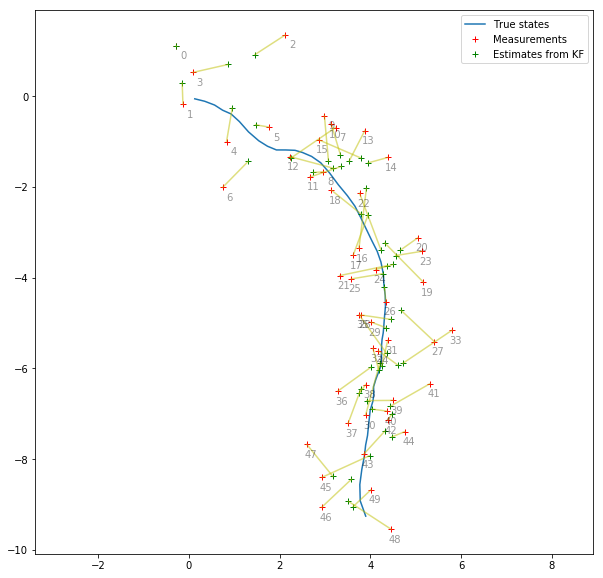

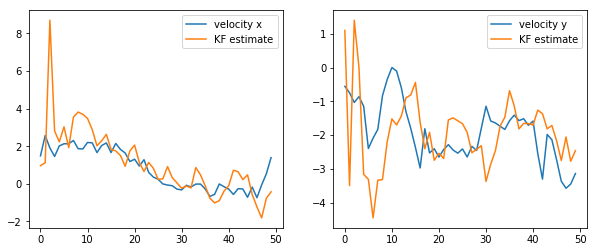

In [24]:
common.plot_results(traj, x_log)

In [11]:
for i, P_ in enumerate(P_log):
    if i % 5 == 0:
        print('Step {}'.format(i))
        print(P_.round(2))
        print()

Step 0
[[ 0.99 -0.    0.1  -0.  ]
 [-0.    0.99 -0.    0.1 ]
 [ 0.1  -0.   99.42 -0.  ]
 [-0.    0.1  -0.   99.42]]

Step 5
[[0.46 0.02 1.27 0.04]
 [0.02 0.46 0.04 1.27]
 [1.27 0.04 5.73 0.12]
 [0.04 1.27 0.12 5.74]]

Step 10
[[0.29 0.02 0.53 0.03]
 [0.02 0.31 0.02 0.57]
 [0.53 0.02 2.11 0.05]
 [0.03 0.57 0.05 2.18]]

Step 15
[[0.26 0.01 0.49 0.01]
 [0.01 0.24 0.01 0.45]
 [0.49 0.01 1.99 0.02]
 [0.01 0.45 0.02 1.92]]

Step 20
[[ 0.24 -0.    0.46 -0.  ]
 [-0.    0.26 -0.    0.47]
 [ 0.46 -0.    1.93  0.01]
 [-0.    0.47  0.01  1.94]]

Step 25
[[0.24 0.   0.45 0.01]
 [0.   0.24 0.01 0.44]
 [0.45 0.01 1.91 0.02]
 [0.01 0.44 0.02 1.9 ]]

Step 30
[[0.22 0.01 0.43 0.01]
 [0.01 0.25 0.01 0.48]
 [0.43 0.01 1.86 0.03]
 [0.01 0.48 0.03 1.97]]

Step 35
[[ 0.23 -0.    0.44 -0.01]
 [-0.    0.24 -0.01  0.45]
 [ 0.44 -0.01  1.87 -0.03]
 [-0.01  0.45 -0.03  1.91]]

Step 40
[[0.21 0.01 0.41 0.01]
 [0.01 0.21 0.01 0.41]
 [0.41 0.01 1.83 0.02]
 [0.01 0.41 0.02 1.83]]

Step 45
[[0.23 0.02 0.45 0.04]
 [0.0